In [1]:
import matplotlib.pyplot as plt
import numpy as np
from contpy import optimize

In [2]:
# Defining a Residual Equation for R(x,p) for the spiral
a1, b1 = 0, 0.5
w = 2               
R = lambda x, p : np.array([(x[0] - (a1 + b1*p)*np.cos(w*p)), (x[1] - (a1 + b1*p)*np.sin(w*p))]) 

# computing Analytical jacobian
JRx = lambda p : lambda x :  np.eye(2)
JRp = lambda x : lambda p :  -1.0*np.array([[-b1*p*w*np.sin(w*p) + b1*np.cos(w*p), b1*p*w*np.cos(w*p) + b1*np.sin(w*p)]])

# computing numerical jacobian
JRp_num = lambda x : optimize.real_jacobian(lambda p : R(x,p))
JRx_num = lambda p : optimize.complex_jacobian(lambda x : R(x,p))


In [3]:
# Check error between analytical and numerical derivative in terms of x
xn = np.array([0,1])
pn = 1
J_ana_eval = JRx(pn)(xn)
J_num_eval = JRx_num(pn)(xn)

error_norm = np.linalg.norm((J_ana_eval - J_num_eval).flatten())
print('Error norm between numerical and analytical Jacobian in x =  %e' %error_norm)

Error norm between numerical and analytical Jacobian in x =  3.140185e-16


In [4]:
# Check error between analytical and numerical derivative in terms of p
Jp_ana_eval = JRp(xn)(pn)
Jp_num_eval = JRp_num(xn)(pn)

error_norm = np.linalg.norm((Jp_ana_eval - Jp_num_eval).flatten())
print('Error norm between numerical and analytical Jacobian in p = %e' %error_norm)

Error norm between numerical and analytical Jacobian in p = 4.825861e-14


In [5]:
%%time
# continuation with numerical Jacobian
x0=np.array([0.0,0.0])
x_sol, p_sol, info_dict = optimize.continuation(R,x0=x0,jacx=JRx_num,jacp=JRp_num,
                                                p_range=(-10.0,10.0),p0=0.0,max_dp=0.1,step=0.1,max_int=500)

Wall time: 15.9 s


Text(0.5,1,'Continuation with Numerical Jacobian')

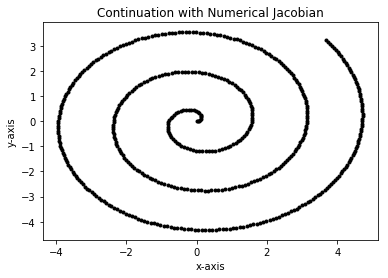

In [6]:
# ploting continuation curve with numerical jacobian
plt.figure()
plt.plot(x_sol[0,:].real,x_sol[1,:].real,'k.')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Continuation with Numerical Jacobian')

In [7]:
%%time
# continuation with analytical Jacobian
x0=np.array([0.0,0.0])
x_sol, p_sol, info_dict = optimize.continuation(R,x0=x0,jacx=JRx,jacp=JRp,
                                                p_range=(-10.0,10.0),p0=0.0,max_dp=0.1,step=0.1,max_int=500)

Wall time: 104 ms


Text(0.5,1,'Continuation with Analytical Jacobian')

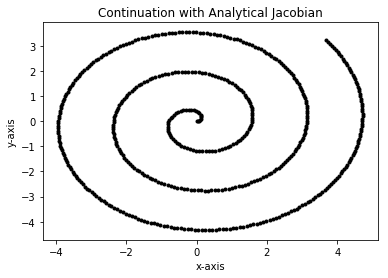

In [8]:
# ploting continuation curve with analytical
plt.figure()
plt.plot(x_sol[0,:],x_sol[1,:],'k.')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Continuation with Analytical Jacobian')